## To Do:
- look for non-lens galaxy clusters or group galaxies
- batches for parallelization
- limit training epochs to 50 
- increase non-lens images
    - make sure current non-lenses are not single object
- look at top ranked and borderline
- look at fits for 1.9 scored lenses


In [1]:
import sys
sys.path.append('..')
import time
from astropy.table import Table
import pyfits as fits
import numpy as np
import matplotlib.pyplot as plt
from os.path import expanduser
from deeplens.resnet_classifier import deeplens_classifier

from deeplens.utils.blfchallenge import classify_ground_challenge 

from sklearn import metrics

home = expanduser("~")

Using Theano backend.


In [37]:
imgs = 120

model_num = 13


# Path to the downloaded files
# download_path=home+'/Desktop/' # To be adjusted on your machine
download_path='//Volumes/CJSTORFER/' # To be adjusted on your machine



# Path to export the data
export_path=home+'/Desktop/'   # To be adjusted on your machine

x_train = np.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_{}/x_y_sets/x_train.npy'.format(model_num))

y_train = np.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_{}/x_y_sets/y_train.npy'.format(model_num))

xval = np.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_{}/x_y_sets/xval.npy'.format(model_num))

yval = np.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_{}/x_y_sets/yval.npy'.format(model_num))

In [38]:
print x_train.shape
print y_train.shape
print xval.shape
print yval.shape

(499, 3, 101, 101)
(499, 1)
(203, 3, 101, 101)
(203, 1)


In [135]:
model = deeplens_classifier()
model.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_{}/saves/deeplens_params_final.npy'.format(model_num), x_train, y_train)
# model.load('/Users/Chris/CMUDeeplens/notebooks/deeplens_params_100.npy'.format(model_num), x_train, y_train)



loading from /Users/Chris/Desktop/DECals_set/Trained_Models/model_13/saves/deeplens_params_final.npy...
Model loaded


In [136]:
#--------------------------------------------Preping the test set--------------------------------------------#
idx_0 = np.where(yval == 0)
idx_1 = np.where(yval == 1)
print len(idx_0[0])
print len(idx_1[0])

165
38


In [137]:
nlens = np.delete(xval,idx_0[0], axis = 0)
lens = np.delete(xval,idx_1[0],axis = 0)
print nlens.shape
print lens.shape

(38, 3, 101, 101)
(165, 3, 101, 101)


In [138]:
prob_0 = model.predict_proba(nlens)
print 'prob 0 done'


prob_1 = model.predict_proba(lens)
print 'prob 1 done'

prob 0 done
prob 1 done


In [139]:
prob = np.concatenate((prob_0,prob_1))

In [140]:
prob_log = np.log(prob)

In [141]:
prob_log_0 = np.log(prob_0)
prob_log_1 = np.log(prob_1)

In [142]:
print prob_log_1.min()

-20.4422


In [143]:
import matplotlib

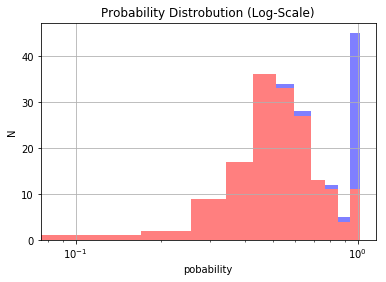

In [144]:
fig, ax = plt.subplots()
fig.figsize = (20,5)
# ax.hist(prob_log_0, bins = 12, color = 'blue', alpha = 0.5,histtype='bar', stacked=True)
# ax.hist(prob_log_1, bins = 12, color = 'red', alpha = 0.5,histtype='bar', stacked=True)
ax.hist([(prob_log_1-prob_log_1.min())/20,(prob_log_0-prob_log_1.min())/20], bins = 12, color = ['red','blue'], alpha = 0.5, stacked=True)
plt.xticks((0,1,21))
ax.set_xscale('log')


plt.title('Probability Distrobution (Log-Scale)')
plt.ylabel('N')
plt.xlabel('pobability')
ax.grid(True)
plt.show()

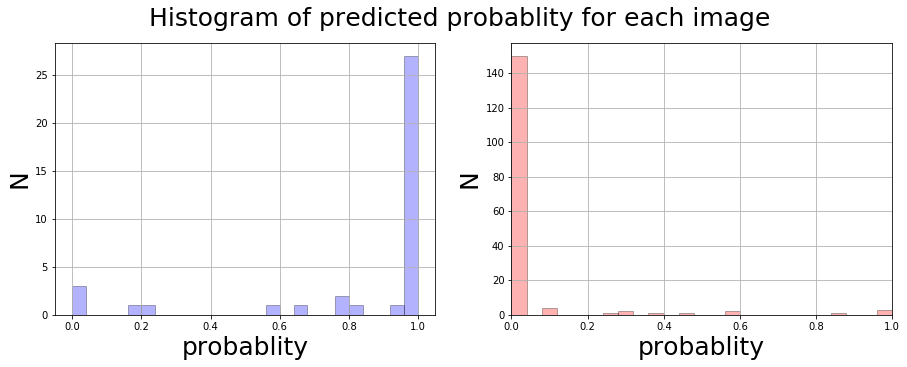

max prob for non-lens:  0.99945
min prob for non-lens:  1.32459e-09
90th percentile:  0.0256060987711
median prob for nonlens:  7.26533e-05
10th percentile:  1.53288699494e-06

max prob for lens:  1.0
min prob for lens:  8.69791e-05
mean prob for lens:  0.835438
std prob for lens:  0.312022
90th percentile:  0.999898201227
median prob for lens:  0.994773
10th percentile:  0.191100145876


In [145]:
n_bins = 25

plt.figure(figsize= (15,5))
plt.subplot(121)
plt.hist(prob_0, bins = n_bins, color = 'blue', alpha = 0.3, range = (0,1),edgecolor = 'black')
plt.xlabel('probablity', fontsize = 25)
plt.ylabel('N', fontsize = 25)
# plt.xscale('log')
plt.grid(True)
plt.subplot(122)
plt.hist(prob_1, bins = n_bins, color = 'red', alpha = 0.3, range = (0,prob_1.max()),edgecolor = 'black')
plt.suptitle('Histogram of predicted probablity for each image', fontsize = 25)
# plt.plot([1e-6,1e-6],[0,14], color = 'black')
# plt.plot([2e-6,2e-6],[0,14], color = 'black')
# plt.plot([3e-6,3e-6],[0,14], color = 'black')
plt.xlabel('probablity', fontsize = 25)
plt.ylabel('N', fontsize = 25)
plt.xlim([0,prob_1.max()])
# plt.xscale('log')

plt.grid(True)
# plt.savefig('probability distrobution.png')
plt.show()
print 'max prob for non-lens: ',prob_1.max()
print 'min prob for non-lens: ',prob_1.min()
print '90th percentile: ', np.percentile(prob_1, 90)
print 'median prob for nonlens: ',np.median(prob_1)
print '10th percentile: ', np.percentile(prob_1, 10)

print '\nmax prob for lens: ',prob_0.max()
print 'min prob for lens: ',prob_0.min()
print 'mean prob for lens: ',prob_0.mean()
print 'std prob for lens: ',prob_0.std()
print '90th percentile: ', np.percentile(prob_0, 90)
print 'median prob for lens: ',np.median(prob_0)
print '10th percentile: ', np.percentile(prob_0, 10)

lens 90th: 0.999898
lens 80th: 0.999435
lens 70th: 0.998202
lens 60th: 0.997431
lens 50th: 0.994773
lens 40th: 0.981469
lens 30th: 0.963238
lens 20th: 0.782488
lens 10th: 0.191100
non-lens 90th: 2.56e-02
non-lens 80th: 1.90e-03
non-lens 70th: 4.21e-04
non-lens 60th: 2.06e-04
non-lens 50th: 7.27e-05
non-lens 40th: 3.56e-05
non-lens 30th: 1.55e-05
non-lens 20th: 9.75e-06
non-lens 10th: 1.53e-06


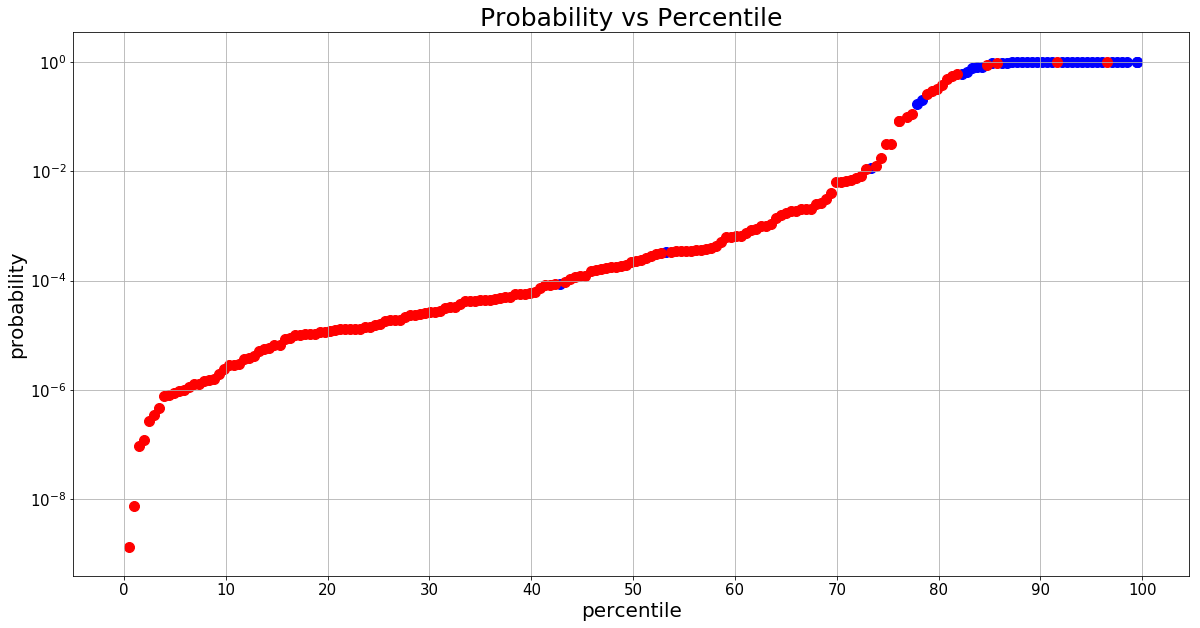

In [148]:
import scipy
plt.figure(figsize = (20,10))
plt.title('Probability vs Percentile', fontsize = 25)
plt.ylabel('probability', fontsize = 20)
plt.xlabel('percentile', fontsize = 20)
plt.yticks(np.linspace(0,1,11),fontsize=15)
plt.xticks(np.linspace(0,100,11),fontsize=15)
ax = plt.gca()
ax.set_yscale('log')

for i in range (38):
    ax.scatter(scipy.stats.percentileofscore(prob,prob_0[i]),(prob_0[i]),color = 'blue', s = 100)
    plt.grid(True)
    
for j in range (165):
    ax.scatter(scipy.stats.percentileofscore(prob,prob_1[j]),(prob_1[j]), color = 'red', s = 100)
    plt.grid(True)

for k in range(9):
    print 'lens {}th: {:06f}'.format(100 - ((k+1)*10),np.percentile(prob_0,100 - ((k+1)*10)))
    
for k in range(9):
    print 'non-lens {}th: {:.2e}'.format(100 - ((k+1)*10),np.percentile(prob_1,100 - ((k+1)*10)))

x = np.linspace(0,100,101) 
y = 1 / (1 + np.exp(-((x*0.4)-32)))
# plt.plot(y, x, linestyle = '--', color = 'green')    

40
96
146


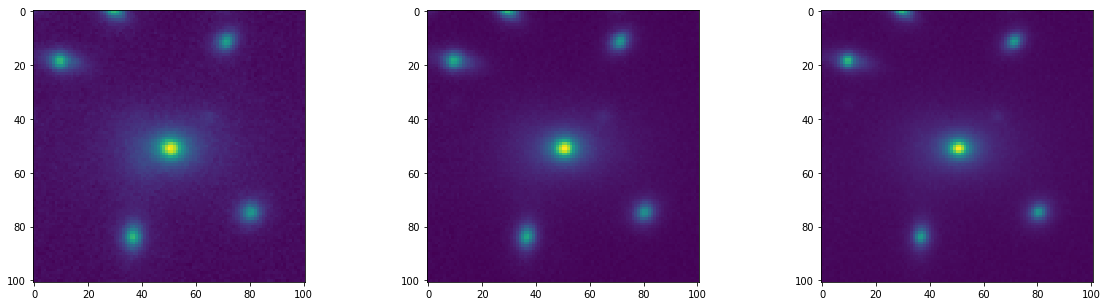

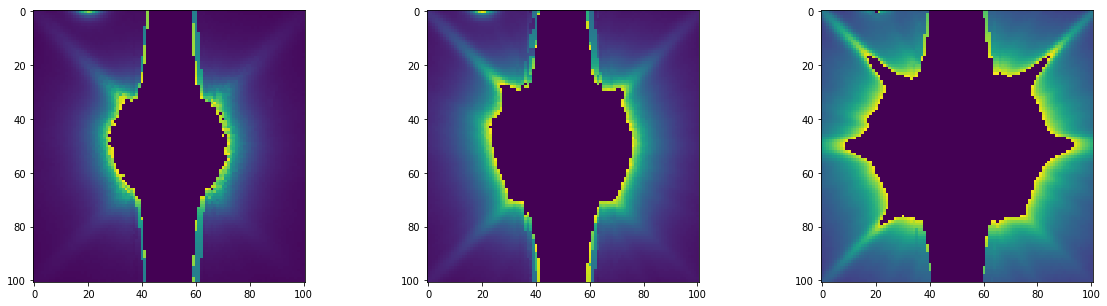

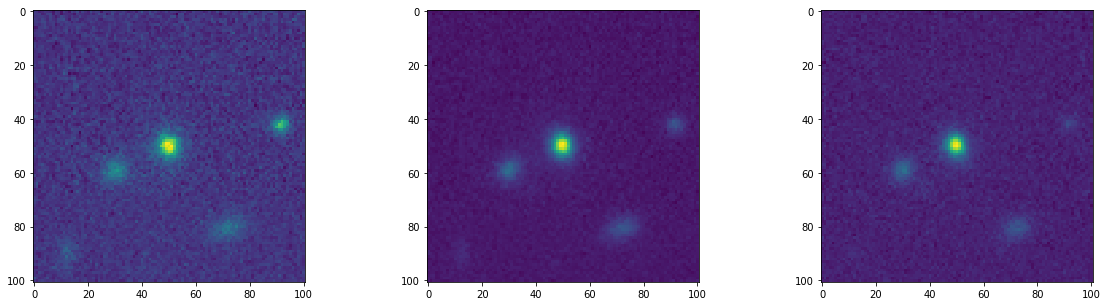

In [149]:
for i, (targ,image,proba) in enumerate(zip(yval,xval,prob)):
    if targ == 0 and proba>0.9:
        plt.figure(figsize = (20,5))
        plt.subplot(131)
        plt.imshow(image[0].T)
        plt.subplot(132)
        plt.imshow(image[1].T)
        plt.subplot(133)
        plt.imshow(image[2].T)
        print i
    

In [368]:
model_2_num = 10
x_train_2 = np.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_{}/x_y_sets/x_train.npy'.format(model_2_num))

y_train_2 = np.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_{}/x_y_sets/y_train.npy'.format(model_2_num))

xval_2 = np.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_{}/x_y_sets/xval.npy'.format(model_2_num))

yval_2 = np.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_{}/x_y_sets/yval.npy'.format(model_2_num))

In [369]:
model_2 = deeplens_classifier()
model_2.load('/Users/Chris/Desktop/DECals_set/Trained_Models/model_{}/saves/deeplens_params_final.npy'.format(model_2_num), x_train_2, y_train_2)

loading from /Users/Chris/Desktop/DECals_set/Trained_Models/model_10/saves/deeplens_params_final.npy...
Model loaded


In [370]:
idx_0_2 = np.where(yval_2 == 0)
idx_1_2 = np.where(yval_2 == 1)
nlens_2 = np.delete(xval_2,idx_0[0], axis = 0)
lens_2 = np.delete(xval_2,idx_1[0],axis = 0)
print nlens_2.shape
print lens_2.shape

prob_0_2 = model_2.predict_proba(nlens_2)
print 'prob 0 done'


prob_1_2 = model_2.predict_proba(lens_2)
print 'prob 1 done'

(35, 3, 101, 101)
(20, 3, 101, 101)
prob 0 done
prob 1 done


In [371]:
prob_2 = np.concatenate((prob_0_2,prob_1_2))

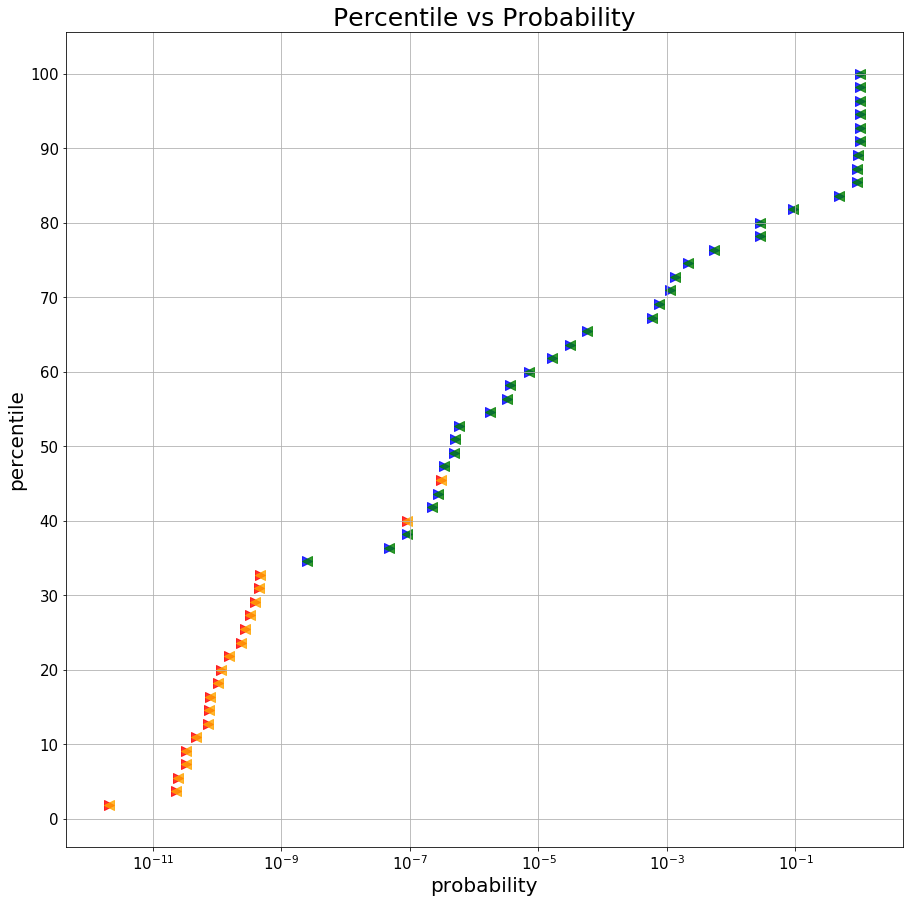

In [380]:
import scipy
plt.figure(figsize = (15,15))
plt.title('Percentile vs Probability', fontsize = 25)
plt.ylabel('percentile', fontsize = 20)
plt.xlabel('probability', fontsize = 20)
plt.xticks(np.linspace(0,2,21),fontsize=15)
plt.yticks(np.linspace(0,100,11),fontsize=15)
ax = plt.gca()
ax.set_xscale('log')

for i in range (35):
    ax.scatter((prob_0_2[i]),scipy.stats.percentileofscore(prob_2,prob_0_2[i]),color = 'blue', s = 100,alpha = 0.8, marker = '>')
    plt.grid(True)

for j in range (20):
    ax.scatter((prob_1_2[j]),scipy.stats.percentileofscore(prob_2,prob_1_2[j]), color = 'red', s = 100,alpha = 0.8, marker = '>')
    plt.grid(True)
    
for i in range (35):
    ax.scatter((prob_0[i]),scipy.stats.percentileofscore(prob,prob_0[i]),color = 'green', s = 100,alpha = 0.8, marker = '<')
    plt.grid(True)
    
for j in range (20):
    ax.scatter((prob_1[j]),scipy.stats.percentileofscore(prob,prob_1[j]), color = 'orange', s = 100,alpha = 0.8, marker = '<')
    plt.grid(True)


x_2 = np.linspace(30,60,101) 
y_2 = 1 / (1 + np.exp(-((x_2*0.65)-27)))
# plt.plot(x_2, y_2, linestyle = '--', color = 'black')    
x = np.linspace(45,100,101) 
y = 1 / (1 + np.exp(-((x*0.2)-14.5)))
# plt.plot(x, y, linestyle = '--', color = 'black')    
plt.show()

In [9]:
from sklearn import metrics

In [91]:
fpr_sk, tpr_sk, thresholds_sk = metrics.roc_curve(yval, prob, pos_label=1)

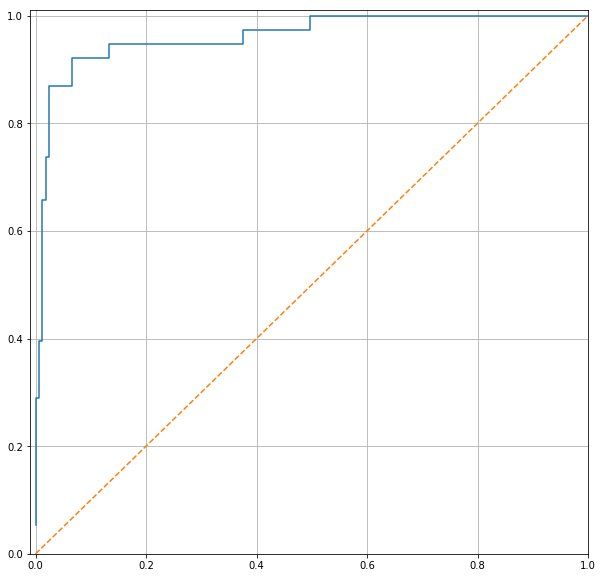

AUC:  0.961562998405


In [92]:
plt.figure(figsize = (10,10))
plt.plot(fpr_sk,tpr_sk)
plt.xlim([-0.01,1.])
plt.ylim([0,1.01])
plt.plot([0,1],[0,1],linestyle = '--')
plt.grid(True)
plt.show()
print 'AUC: ',metrics.auc(fpr_sk, tpr_sk)

In [16]:
idx = np.where(fpr_sk==0)

In [17]:
print idx


(array([0, 1]),)


In [376]:
fpr_sk_2, tpr_sk_2, thresholds_sk_2 = metrics.roc_curve(yval_2, prob_2, pos_label=1)

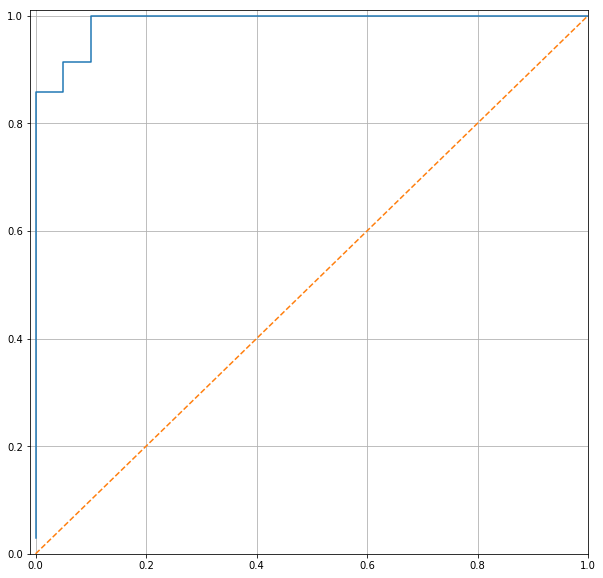

AUC:  0.988571428571


In [377]:
plt.figure(figsize = (10,10))
plt.plot(fpr_sk_2,tpr_sk_2)
plt.xlim([-0.01,1.])
plt.ylim([0,1.01])
plt.plot([0,1],[0,1],linestyle = '--')
plt.grid(True)
plt.show()
print 'AUC: ',metrics.auc(fpr_sk_2, tpr_sk_2)

In [93]:
tpr,fpr, t = model.eval_ROC(xval,yval)

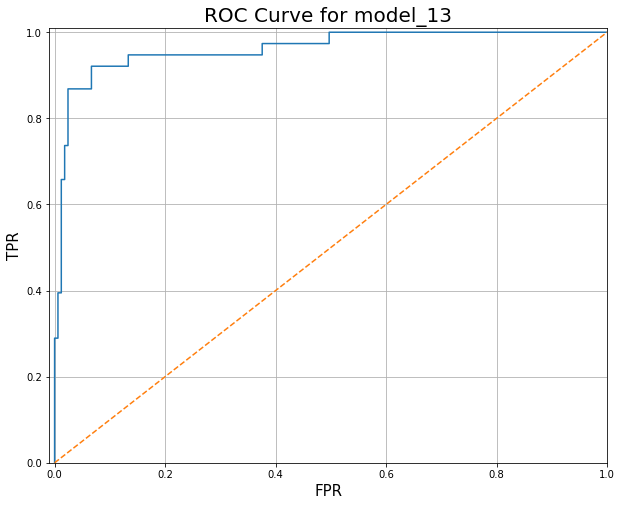

AUC:  0.961563169956


In [105]:
plt.figure(figsize = (10,8))
plt.plot(fpr,tpr)
plt.xlim([-0.01,1.])
plt.ylim([0,1.01])
plt.grid(True)
plt.plot([0,1],[0,1],linestyle = '--')
plt.title('ROC Curve for model_13', fontsize = 20)
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.show()
print 'AUC: ',metrics.auc(fpr, tpr)

In [132]:
idx = np.where(fpr<=0)

In [133]:
tpr_idx = tpr[idx]


In [134]:
tpr_idx.max()

0.28947368

In [149]:
q = np.reshape(model.predict_proba(xval), (-1, 1))

In [171]:
t = np.linspace(0,1,10000000) #CS: origionaly 1000

upper, lower = 1, 0

p = np.where(q > t, upper, lower)

n_fp = np.sum(p * (yval == 0), axis=0).astype('float64')
n_tp = np.sum(p * yval, axis=0).astype('float64')

tpr_manual = n_tp / np.sum(yval).astype('float64')
fpr_manual = n_fp / np.sum( yval == 0).astype('float64')

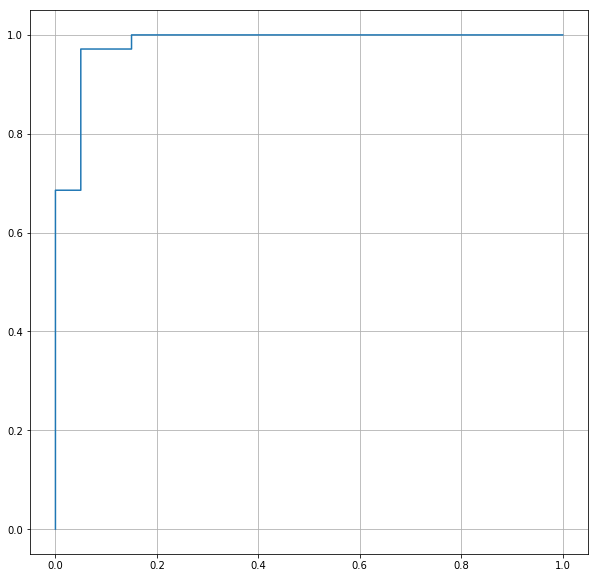

AUC:  0.981428571429


In [198]:
plt.figure(figsize = (10,10))
plt.plot(fpr_manual,tpr_manual)
# plt.xlim([-0.01,1.])
# plt.ylim([0,1.01])
plt.grid(True)
plt.show()
print 'AUC: ', metrics.auc(fpr_manual, tpr_manual)


In [147]:
idx_kept = np.load('/Users/Chris/Downloads/kept_decals_nonlenses.npy')
print idx_kept[0]['cutout'][7:]
for i, index in enumerate(idx_kept):
    print index['cutout'][7:]
#     kept = fits.getdata('/Users/Chris/Downloads/kept_decals_nonlenses_check_fits/kept_decals_nonlens_check_{}.fits'.format(index['cutout'][7:]))
    
    
    
    
    

000011
000011
000040
000131
000240
000259
000305
000306
000427
010027
010098
010145
010182
018006
018081
020450
019550
019554
019595
019635
019636
029080

029759
031616
031771
032063
032095
038061
038406
042763
042970
057873




















































































































































































































































































































































































































































































